In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset

In [54]:
df = pd.read_csv('hour.csv', index_col='instant')
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [56]:
categories_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'C', 'cnt']
date_columns = ['dteday']

In [57]:
mixed_indexes = np.random.permutation(len(df))

In [58]:
train_size = int(0.8 * len(df))
df_train = df.iloc[ mixed_indexes, : ][:train_size]
df_test = df.iloc[ mixed_indexes, : ][train_size:]
df_train.shape[0] + df_test.shape[0] == df.shape[0]

True

Future preprocessing for train. Pipeline for test preprocessing will be created later

# Data analysis

Drop casual and registered as terms of cnt

In [59]:
df_train = df_train.drop(['casual', 'registered'], axis=1)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [60]:
X_train = df_train.drop(['cnt'], axis=1)
y_train = df_train.loc[:, 'cnt']
X_train.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,,
5310,2011-08-14,3,0,8,3,0,0,0,2,0.64,0.5606,0.94,0.2537
13013,2012-07-01,3,1,7,9,0,0,0,1,0.82,0.7879,0.56,0.0000
14029,2012-08-12,3,1,8,17,0,0,0,1,0.80,0.6970,0.33,0.0000
14190,2012-08-19,3,1,8,10,0,0,0,2,0.68,0.6364,0.69,0.0000
11238,2012-04-18,2,1,4,10,0,3,1,3,0.48,0.4697,0.47,0.2239


In [61]:
y_train.head()

instant
5310      27
13013    219
14029    505
14190    425
11238    147
Name: cnt, dtype: int64

<AxesSubplot:>

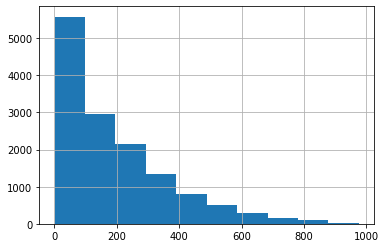

In [62]:
y_train.hist()

Drop dteday because in year, month

In [63]:
X_train = X_train.drop('dteday', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,
5310,3,0,8,3,0,0,0,2,0.64,0.5606,0.94,0.2537
13013,3,1,7,9,0,0,0,1,0.82,0.7879,0.56,0.0000
14029,3,1,8,17,0,0,0,1,0.80,0.6970,0.33,0.0000
14190,3,1,8,10,0,0,0,2,0.68,0.6364,0.69,0.0000
11238,2,1,4,10,0,3,1,3,0.48,0.4697,0.47,0.2239


## Correlation analysis

<AxesSubplot:>

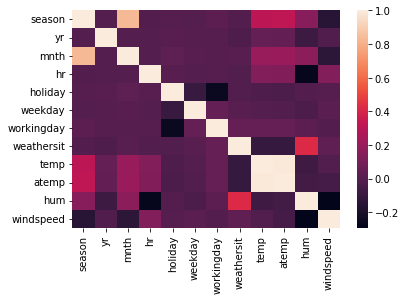

In [64]:
sns.heatmap(X_train.corr())

High correlation: season and month, temp and atemp. Drop temp

In [65]:
X_train = X_train.drop('temp', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
instant,,,,,,,,,,,
5310,3,0,8,3,0,0,0,2,0.5606,0.94,0.2537
13013,3,1,7,9,0,0,0,1,0.7879,0.56,0.0000
14029,3,1,8,17,0,0,0,1,0.6970,0.33,0.0000
14190,3,1,8,10,0,0,0,2,0.6364,0.69,0.0000
11238,2,1,4,10,0,3,1,3,0.4697,0.47,0.2239


In [66]:
pca = PCA(n_components=1)
temp = X_train.loc[:, ['season', 'mnth']]
temp['year_season'] = pca.fit_transform(temp)
X_train = X_train.drop(['season', 'mnth'], axis=1)
X_train['year_season'] = temp['year_season'] 
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,year_season
instant,,,,,,,,,,
5310,0,3,0,0,0,2,0.5606,0.94,0.2537,-1.539139
13013,1,9,0,0,0,1,0.7879,0.56,0.0000,-0.575304
14029,1,17,0,0,0,1,0.6970,0.33,0.0000,-1.539139
14190,1,10,0,0,0,2,0.6364,0.69,0.0000,-1.539139
11238,1,10,0,3,1,3,0.4697,0.47,0.2239,2.582701


In [67]:
X_train.loc[:, 'hum'] = StandardScaler().fit_transform(X_train.loc[:, 'hum'].values.reshape(-1, 1))
X_train.loc[:, 'windspeed'] = StandardScaler().fit_transform(X_train.loc[:, 'windspeed'].values.reshape(-1, 1))
X_train.loc[:, 'year_season'] = StandardScaler().fit_transform(X_train.loc[:, 'year_season'].values.reshape(-1, 1))
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,year_season
instant,,,,,,,,,,
5310,0,3,0,0,0,2,0.5606,1.619924,0.522709,-0.432054
13013,1,9,0,0,0,1,0.7879,-0.348045,-1.556795,-0.161494
14029,1,17,0,0,0,1,0.6970,-1.539185,-1.556795,-0.432054
14190,1,10,0,0,0,2,0.6364,0.325207,-1.556795,-0.432054
11238,1,10,0,3,1,3,0.4697,-0.814144,0.278447,0.724993


## Dummies for categorical

In [68]:
df_weekday_dummies = pd.get_dummies(X_train['weekday'], prefix='weekday')
df_weekday_dummies

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,
5310,1,0,0,0,0,0,0
13013,1,0,0,0,0,0,0
14029,1,0,0,0,0,0,0
14190,1,0,0,0,0,0,0
11238,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
4660,0,1,0,0,0,0,0
5282,0,0,0,0,0,1,0
6832,0,1,0,0,0,0,0


In [69]:
X_train = pd.concat([X_train, df_weekday_dummies], axis=1).drop('weekday', axis=1)
X_train

,yr,hr,holiday,workingday,weathersit,atemp,hum,windspeed,year_season,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,
5310,0,3,0,0,2,0.5606,1.619924,0.522709,-0.432054,1,0,0,0,0,0,0
13013,1,9,0,0,1,0.7879,-0.348045,-1.556795,-0.161494,1,0,0,0,0,0,0
14029,1,17,0,0,1,0.6970,-1.539185,-1.556795,-0.432054,1,0,0,0,0,0,0
14190,1,10,0,0,2,0.6364,0.325207,-1.556795,-0.432054,1,0,0,0,0,0,0
11238,1,10,0,1,3,0.4697,-0.814144,0.278447,0.724993,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,0,1,0,1,1,0.6667,0.584151,0.278447,-0.161494,0,1,0,0,0,0,0
5282,0,23,0,1,1,0.6364,-0.606989,-1.556795,-0.432054,0,0,0,0,0,1,0
6832,0,5,0,1,1,0.4848,0.014475,0.889922,-1.047982,0,1,0,0,0,0,0


In [70]:
df_weathersit_dummies = pd.get_dummies(X_train['weathersit'], prefix='weathersit')
X_train = pd.concat([X_train, df_weathersit_dummies], axis=1).drop('weathersit', axis=1)
X_train

,yr,hr,holiday,workingday,atemp,hum,windspeed,year_season,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,
5310,0,3,0,0,0.5606,1.619924,0.522709,-0.432054,1,0,0,0,0,0,0,0,1,0,0
13013,1,9,0,0,0.7879,-0.348045,-1.556795,-0.161494,1,0,0,0,0,0,0,1,0,0,0
14029,1,17,0,0,0.6970,-1.539185,-1.556795,-0.432054,1,0,0,0,0,0,0,1,0,0,0
14190,1,10,0,0,0.6364,0.325207,-1.556795,-0.432054,1,0,0,0,0,0,0,0,1,0,0
11238,1,10,0,1,0.4697,-0.814144,0.278447,0.724993,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4660,0,1,0,1,0.6667,0.584151,0.278447,-0.161494,0,1,0,0,0,0,0,1,0,0,0
5282,0,23,0,1,0.6364,-0.606989,-1.556795,-0.432054,0,0,0,0,0,1,0,1,0,0,0
6832,0,5,0,1,0.4848,0.014475,0.889922,-1.047982,0,1,0,0,0,0,0,1,0,0,0


Function for data preprocessing

In [71]:
def data_preprocessing(X, pca):
    X = X.drop('dteday', axis=1)
    temp = X.loc[:, ['season', 'mnth']]
    temp['year_season'] = pca.transform(temp)
    X = X.drop(['season', 'mnth'], axis=1)
    X['year_season'] = temp['year_season'] 
    
    X.loc[:, 'hum'] = StandardScaler().fit_transform(X.loc[:, 'hum'].values.reshape(-1, 1))
    X.loc[:, 'windspeed'] = StandardScaler().fit_transform(X.loc[:, 'windspeed'].values.reshape(-1, 1))
    X.loc[:, 'season_mnth'] = StandardScaler().fit_transform(X.loc[:, 'year_season'].values.reshape(-1, 1))
    
    df_weekday_dummies = pd.get_dummies(X['weekday'], prefix='weekday')
    X = pd.concat([X, df_weekday_dummies], axis=1).drop('weekday', axis=1)

    df_weathersit_dummies = pd.get_dummies(X['weathersit'], prefix='weathersit')
    X = pd.concat([X, df_weathersit_dummies], axis=1).drop('weathersit', axis=1)

    return X


In [72]:
X_test = df_test.drop(['cnt'], axis=1)
y_test = df_test.loc[:, 'cnt']

X_test

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
instant,,,,,,,,,,,,,,,
6919,2011-10-20,4,0,10,21,0,4,1,1,0.44,0.4394,0.51,0.2985,16,149
1826,2011-03-21,2,0,3,19,0,1,1,1,0.58,0.5455,0.60,0.4179,22,199
1074,2011-02-17,1,0,2,11,0,4,1,2,0.44,0.4394,0.44,0.2537,19,71
11979,2012-05-19,2,1,5,7,0,6,0,1,0.46,0.4545,0.67,0.1045,28,67
5108,2011-08-05,3,0,8,17,0,5,1,1,0.78,0.7121,0.49,0.2985,84,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,2011-04-02,2,0,4,21,0,6,0,1,0.32,0.3030,0.61,0.2537,24,53
14110,2012-08-16,3,1,8,2,0,4,1,1,0.64,0.6061,0.69,0.1940,0,15
338,2011-01-15,1,0,1,13,0,6,0,1,0.28,0.2576,0.38,0.2985,21,80


In [73]:
X_test = data_preprocessing(X_test, pca)
X_test

,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
6919,0,21,0,1,0.44,0.4394,-0.610269,0.871097,16,149,...,0,0,0,1,0,0,1,0,0,0
1826,0,19,0,1,0.58,0.5455,-0.142130,1.836561,22,199,...,1,0,0,0,0,0,1,0,0,0
1074,0,11,0,1,0.44,0.4394,-0.974378,0.508845,19,71,...,0,0,0,1,0,0,0,1,0,0
11979,1,7,0,0,0.46,0.4545,0.221979,-0.697581,28,67,...,0,0,0,0,0,1,1,0,0,0
5108,0,17,0,1,0.78,0.7121,-0.714300,0.871097,84,466,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,0,21,0,0,0.32,0.3030,-0.090114,0.508845,24,53,...,0,0,0,0,0,1,1,0,0,0
14110,1,2,0,1,0.64,0.6061,0.326010,0.026113,0,15,...,0,0,0,1,0,0,1,0,0,0
338,0,13,0,0,0.28,0.2576,-1.286471,0.871097,21,80,...,0,0,0,0,0,1,1,0,0,0
